In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/zomato.csv


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/zomato/zomato.csv")
# Display the first few rows of the dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


You have to perform the following tasks:
Data Cleaning:

Deleting redundant columns.
Renaming the columns.
Dropping duplicates.
Cleaning individual columns.
Remove the NaN values from the dataset
Check for some more Transformations
Data Visualization:

Restaurants delivering Online or not
Restaurants allowing table booking or not
Table booking Rate vs Rate
Best Location
Relation between Location and Rating
Restaurant Type
Gaussian Rest type and Rating
Types of Services
Relation between Type and Rating
Cost of Restaurant
No. of restaurants in a Location
Restaurant type
Most famous restaurant chains in Bengaluru
Regression Analysis:

Linear Regression
Decision Tree Regression
Random Forest Regression

In [3]:
# Lets check the contents first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Deleting redundant columns.


In [4]:
columns_to_drop = ['url', 'address','phone','menu_item', 'dish_liked']

df.drop(columns_to_drop, axis = 1, inplace = True)

Dropping duplicates

In [5]:
#Lets see which are duplicates. Here we will use duplicated() to check for entire rows that are duplicates.
df[df.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",Dine-out,Bannerghatta Road
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Bellandur
7599,Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...",Delivery,Brookefield
9342,Healthy Parathawala,Yes,No,NEW,0,BTM,Quick Bites,North Indian,200,[],Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...
46553,House Of Candy,Yes,No,NaN,0,Malleshwaram,Confectionery,Desserts,200,[],Delivery,Rajajinagar
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,"[('Rated 4.0', 'RATED\n A perfect place to dr...",Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Sarjapur Road
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,[],Delivery,Whitefield


In [6]:
# Lets drop the duplicate rows

df.drop_duplicates(inplace = True)
df.shape

(51645, 12)

Cleaning columns

In [7]:
df.tail(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4 /5,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars,Whitefield


In [8]:
# cleaning 'rate' column by splitting and returning float

def clean_column(x):
    try:
        x = x.split('/')[0]
        return float(x)
    except:
        return np.nan

df['cleaned_rate']= df['rate'].apply(clean_column)

In [9]:
df.drop('rate', axis=1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51624 non-null  object 
 5   rest_type                    51418 non-null  object 
 6   cuisines                     51600 non-null  object 
 7   approx_cost(for two people)  51300 non-null  object 
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 41622 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


In [11]:
# cleaning cost column column by replacing ',' and returning float

def clean_column(x):
    try:
        x = x.replace(',','')
        return float(x)
    except:
        return np.nan

df['approx_cost(for two people)']= df['approx_cost(for two people)'].apply(clean_column)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51624 non-null  object 
 5   rest_type                    51418 non-null  object 
 6   cuisines                     51600 non-null  object 
 7   approx_cost(for two people)  51300 non-null  float64
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 41622 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


Removing Nan values from cost and rate columns

In [13]:
# Replacing null in rate with mean rate
#rate_mean = df['cleaned_rate'].mean()

rate_mean = df['cleaned_rate'].mean()
df['cleaned_rate'] = df['cleaned_rate'].fillna(rate_mean)

In [14]:
# Check that no nulls exist in rate column
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51624 non-null  object 
 5   rest_type                    51418 non-null  object 
 6   cuisines                     51600 non-null  object 
 7   approx_cost(for two people)  51300 non-null  float64
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 51645 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [15]:
# Replacing null in cost with mean cost
#rate_mean = df['cleaned_rate'].mean()

cost_mean = df['approx_cost(for two people)'].mean()
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(cost_mean)

In [16]:
# check that no nulls exist in cost column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51624 non-null  object 
 5   rest_type                    51418 non-null  object 
 6   cuisines                     51600 non-null  object 
 7   approx_cost(for two people)  51645 non-null  float64
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 51645 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [17]:
# check nulls in cuisines column

df[df['cuisines'].isnull()]

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),cleaned_rate
438,The House Of Vadapav,Yes,No,0,Banashankari,Quick Bites,NaN,150.000000,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",Delivery,Banashankari,3.700526
440,Lassi Spot,Yes,No,4,Kumaraswamy Layout,Beverage Shop,NaN,100.000000,[],Delivery,Banashankari,3.300000
759,The House Of Vadapav,Yes,No,0,Banashankari,Quick Bites,NaN,150.000000,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",Dine-out,Banashankari,3.700526
1662,Papa Khan Rasoi,No,No,0,NaN,NaN,NaN,555.552144,[],Delivery,Bannerghatta Road,3.700526
4037,Chai Point,Yes,No,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200.000000,[],Delivery,Bellandur,3.700526
6887,Noodle Oodle,Yes,No,9,Whitefield,Delivery,NaN,400.000000,"[('Rated 4.0', 'RATED\n Lil oily else good'),...",Delivery,Brookefield,3.600000
6897,Taste of Chettinad,Yes,No,0,Whitefield,Delivery,NaN,400.000000,"[('Rated 1.0', 'RATED\n Biryani quantity was ...",Delivery,Brookefield,3.700526
7277,Watheen Nuts,No,No,0,Whitefield,"Takeaway, Delivery",NaN,400.000000,[],Delivery,Brookefield,3.700526
7555,Delhi Food Factory,Yes,No,0,Marathahalli,Delivery,NaN,500.000000,[],Delivery,Brookefield,3.700526
9874,Papa Khan Rasoi,No,No,0,NaN,NaN,NaN,555.552144,[],Delivery,BTM,3.700526


In [18]:
# replace nulls with 'n/a' in cuisines

df['cuisines'] = df['cuisines'].fillna('n/a')

In [19]:
# check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51624 non-null  object 
 5   rest_type                    51418 non-null  object 
 6   cuisines                     51645 non-null  object 
 7   approx_cost(for two people)  51645 non-null  float64
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 51645 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [20]:
# replace nulls with 'n/a' in rest_type

df['rest_type'] = df['rest_type'].fillna('n/a')

In [21]:
# check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51624 non-null  object 
 5   rest_type                    51645 non-null  object 
 6   cuisines                     51645 non-null  object 
 7   approx_cost(for two people)  51645 non-null  float64
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 51645 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


Now that we have a cleaned dataset, we can move to the next section, Visualizations

In [22]:
# replace nulls with 'n/a' in location

df['location'] = df['location'].fillna('n/a')

In [23]:
# check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51645 non-null  object 
 1   online_order                 51645 non-null  object 
 2   book_table                   51645 non-null  object 
 3   votes                        51645 non-null  int64  
 4   location                     51645 non-null  object 
 5   rest_type                    51645 non-null  object 
 6   cuisines                     51645 non-null  object 
 7   approx_cost(for two people)  51645 non-null  float64
 8   reviews_list                 51645 non-null  object 
 9   listed_in(type)              51645 non-null  object 
 10  listed_in(city)              51645 non-null  object 
 11  cleaned_rate                 51645 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


Visualisations

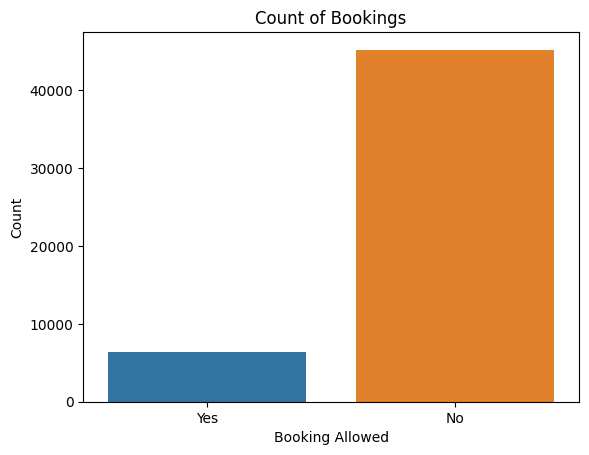

In [24]:
# Count of restaurants allowing booking

import seaborn as sns
import matplotlib.pyplot as plt

# check values
df['book_table'].value_counts()

# Create a figure and axes
fig, axes = plt.subplots()

# Create the plot
sns.countplot(df, x = 'book_table')

# Set labels and title
axes.set_xlabel('Booking Allowed')
axes.set_ylabel('Count')
axes.set_title('Count of Bookings')

# Show the plot
plt.show()

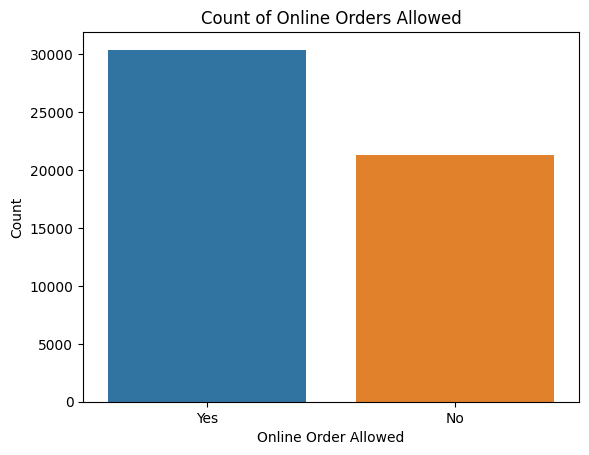

In [25]:
# Count of restaurants allowing online order

import seaborn as sns
import matplotlib.pyplot as plt

# check values
df['online_order'].value_counts()

# # Create a figure and axes
fig, axes = plt.subplots()

# # Create the plot
sns.countplot(df, x = 'online_order')

# # Set labels and title
axes.set_xlabel('Online Order Allowed')
axes.set_ylabel('Count')
axes.set_title('Count of Online Orders Allowed')

# Show the plot
plt.show()

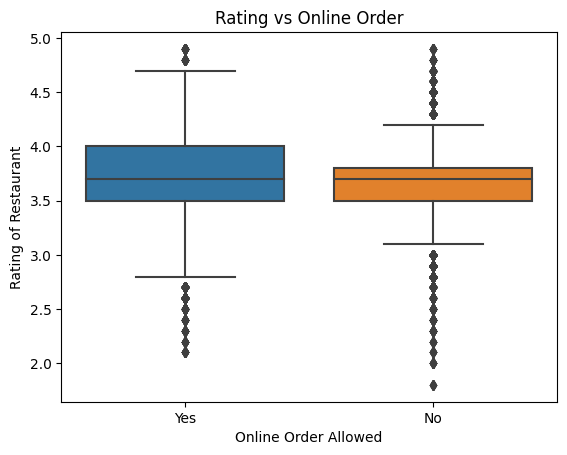

In [26]:
# Relationship between online orders and rating

# # Create a figure and axes
fig, axes = plt.subplots()

# # Create the plot
sns.boxplot(df, x = 'online_order', y= 'cleaned_rate')

# # Set labels and title
axes.set_xlabel('Online Order Allowed')
axes.set_ylabel('Rating of Restaurant')
axes.set_title('Rating vs Online Order')

# Show the plot
plt.show()

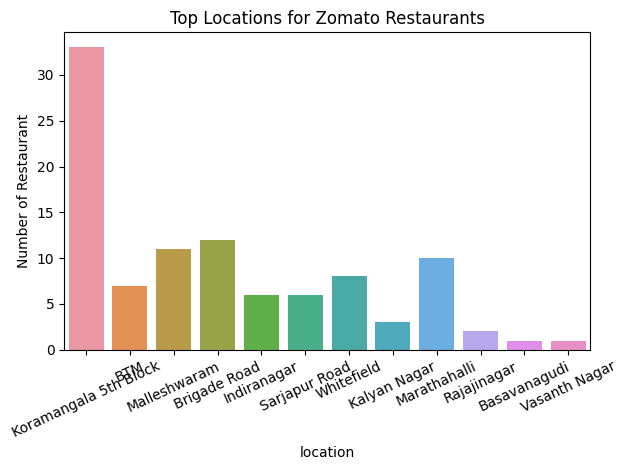

In [27]:
# Location-wise distribution of restaurants


df_sorted = df.sort_values(by=['cleaned_rate'], ascending = False).head(100)

# Create figure and axes
fig, axes = plt.subplots()

# Create plot
sns.countplot(data = df_sorted, x= 'location')


# Rotate x-axis labels and set font size
plt.xticks(rotation=25, fontsize=10)


# # Set labels and title
axes.set_ylabel('Number of Restaurant')
axes.set_title('Top Locations for Zomato Restaurants')


# Adjust layout to prevent clipping
plt.tight_layout()


plt.show()

In [28]:
df_sorted.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),cleaned_rate
20314,Asia Kitchen By Mainland China,Yes,Yes,2202,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,"[('Rated 5.0', ""RATED\n Everything from the a...",Delivery,Jayanagar,4.9
37099,AB's - Absolute Barbecues,No,Yes,6490,BTM,Casual Dining,"European, Mediterranean, North Indian, BBQ",1600.0,"[('Rated 5.0', 'RATED\n Thapush and Rahul ser...",Dine-out,Koramangala 7th Block,4.9
33932,Asia Kitchen By Mainland China,Yes,Yes,2249,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,"[('Rated 3.0', 'RATED\n Hmm not great not bad...",Dine-out,Koramangala 6th Block,4.9
46253,Punjab Grill,Yes,Yes,1973,Malleshwaram,Casual Dining,"North Indian, Mughlai",2000.0,"[('Rated 5.0', 'RATED\n Good food, great serv...",Delivery,Rajajinagar,4.9
17877,Belgian Waffle Factory,Yes,No,1735,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 5.0', 'RATED\n A small cute place in...",Delivery,Indiranagar,4.9
